# K-Means with library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

basicpath = '/content/drive/MyDrive/CBNUDatascience_colab/9주차'

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
path = os.path.join(basicpath, 'Dataset/Clustering')
file = 'input3.csv'
data = pd.read_csv(os.path.join(path, file), index_col=None)

## 데이터 확인

In [4]:
data.head(10)

,x,y
0,69.937766,31.570952
1,20.356235,45.934504
2,72.468891,33.579962
3,70.737504,29.462956
4,53.236145,8.314857
5,49.983086,6.977777
6,40.685368,36.066633
7,20.298744,34.252849
8,51.668822,8.197806
9,18.270403,23.540949


In [5]:
x = data['x']
y = data['y']

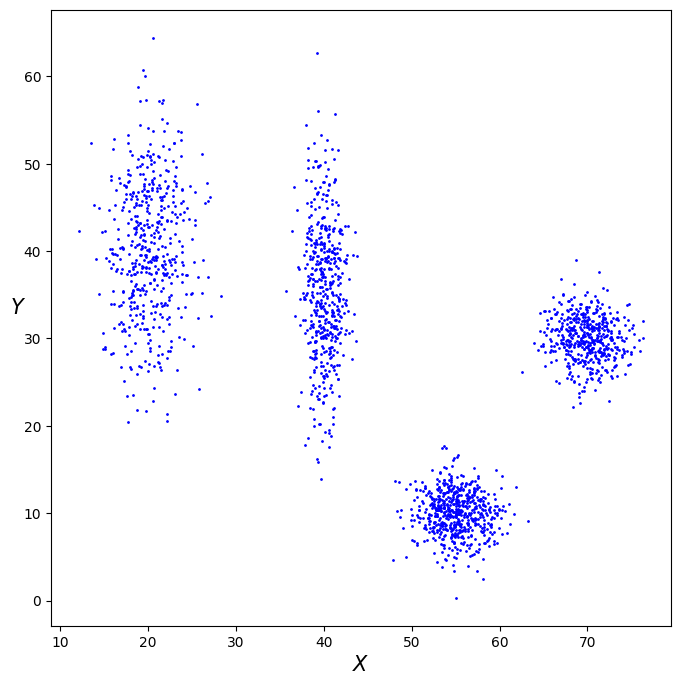

In [6]:
plt.figure(figsize=[8, 8])
plt.scatter(x, y, s=1, c='b')
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$Y$", fontsize=15, rotation=0)
plt.show()

## 과제 2
scikit learn의 KMeans 라이브러리를 활용하여 데이터를 clustering하여 보시오.  
K값을 임의로 바꾸어가며 결과를 확인해보시오.

In [7]:
from sklearn.cluster import KMeans

In [21]:
#답변
model = KMeans(
    n_clusters = 4,
    init = 'random',
)

model.fit(data.values)

KMeans(init='random', n_clusters=4)

In [22]:
model.labels_

array([1, 2, 1, ..., 2, 0, 0], dtype=int32)

## 모델 test

In [23]:
unique_labels = np.unique(model.labels_)
colors = [plt.cm.gist_rainbow(each)
        for each in np.linspace(0, 1, len(unique_labels))]

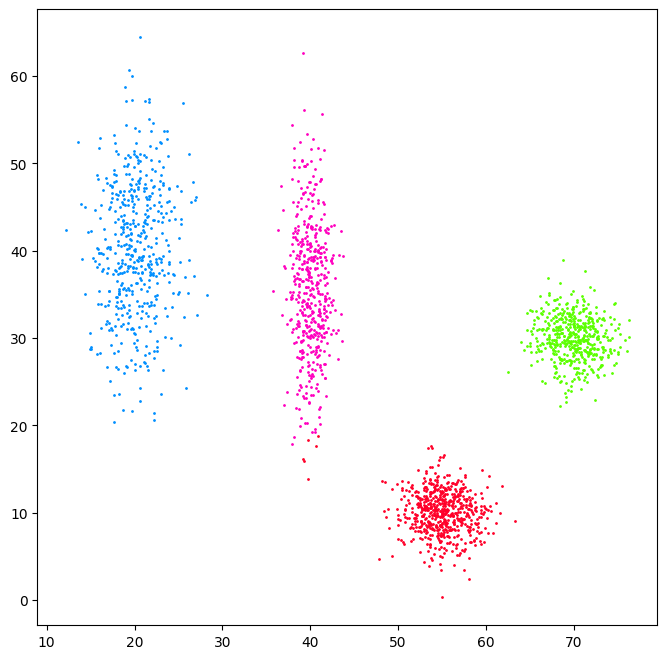

In [24]:
plt.figure(figsize=[8, 8])
for cluster_index, col in zip(unique_labels, colors):
    class_mask = (model.labels_ == cluster_index)
    plt.plot(data.values[class_mask][:, 0],
             data.values[class_mask][:, 1],
            'o', markerfacecolor=tuple(col), markeredgecolor=tuple(col),
            markersize=1)